In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## Load and inspect data

In [2]:
eos_df = pd.read_csv(Path('../../resources/prices/coin_EOS.csv'), index_col='SNo')
eos_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,EOS,EOS,2017-07-02 23:59:59,2.877510,0.822648,0.996521,2.710050,3.204520e+08,0.000000e+00
2,EOS,EOS,2017-07-03 23:59:59,5.395970,2.632310,2.717390,4.086640,4.149500e+08,6.549307e+08
3,EOS,EOS,2017-07-04 23:59:59,4.191240,2.933450,4.098010,3.372000,2.185590e+08,5.501552e+08
4,EOS,EOS,2017-07-05 23:59:59,3.523500,2.730130,3.356000,3.003230,1.243390e+08,5.006264e+08
5,EOS,EOS,2017-07-06 23:59:59,3.867470,3.007830,3.014260,3.361330,1.774630e+08,5.683615e+08
...,...,...,...,...,...,...,...,...,...
1333,EOS,EOS,2021-02-23 23:59:59,4.705856,3.239567,4.705856,3.836130,6.395663e+09,3.647385e+09
1334,EOS,EOS,2021-02-24 23:59:59,4.129780,3.698122,3.838417,3.901178,3.766364e+09,3.709345e+09
1335,EOS,EOS,2021-02-25 23:59:59,4.092918,3.646569,3.900563,3.655080,2.959237e+09,3.475449e+09


In [3]:
eos_df['Date'] = pd.to_datetime(eos_df['Date']).dt.date
eos_df['Date'] = pd.to_datetime(eos_df['Date'])
eos_df['Spread'] = eos_df.High - eos_df.Low
eos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 1 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       1337 non-null   object        
 1   Symbol     1337 non-null   object        
 2   Date       1337 non-null   datetime64[ns]
 3   High       1337 non-null   float64       
 4   Low        1337 non-null   float64       
 5   Open       1337 non-null   float64       
 6   Close      1337 non-null   float64       
 7   Volume     1337 non-null   float64       
 8   Marketcap  1337 non-null   float64       
 9   Spread     1337 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 114.9+ KB


## Plot the closing value of EOS over time

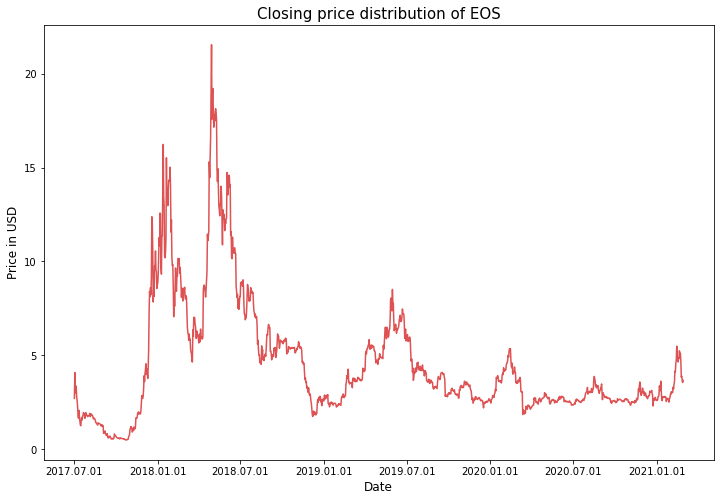

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = eos_df.Close.values, x=eos_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = eos_df.Close.values, x=eos_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of EOS", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

eos_df['Date_mpl'] = eos_df['Date'].apply(lambda x: mdates.date2num(x))

temp_eos_df = eos_df.copy(deep=False)
temp_eos_df = temp_eos_df.set_index(['Date'])
temp_eos_df = temp_eos_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_eos_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2017-07-02,2.877510,0.822648,0.996521,2.710050,3.204520e+08,17349.0
2017-07-03,5.395970,2.632310,2.717390,4.086640,4.149500e+08,17350.0
2017-07-04,4.191240,2.933450,4.098010,3.372000,2.185590e+08,17351.0
2017-07-05,3.523500,2.730130,3.356000,3.003230,1.243390e+08,17352.0
2017-07-06,3.867470,3.007830,3.014260,3.361330,1.774630e+08,17353.0
...,...,...,...,...,...,...
2021-02-23,4.705856,3.239567,4.705856,3.836130,6.395663e+09,18681.0
2021-02-24,4.129780,3.698122,3.838417,3.901178,3.766364e+09,18682.0
2021-02-25,4.092918,3.646569,3.900563,3.655080,2.959237e+09,18683.0


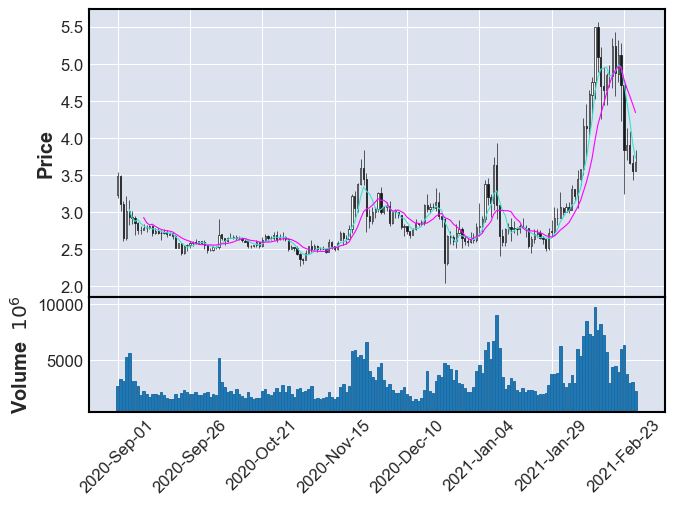

In [6]:
mpf.plot(temp_eos_df.loc['2020-9-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [7]:
from fbprophet import Prophet

In [8]:
INPUT_FILE = "coin_EOS.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-9-1']

m = Prophet(changepoint_prior_scale=.6)
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
182,2021-03-02 23:59:59,4.992039,4.581984,5.429229
183,2021-03-03 23:59:59,5.030316,4.600303,5.449304
184,2021-03-04 23:59:59,5.055519,4.646580,5.478022
185,2021-03-05 23:59:59,5.139756,4.724215,5.537294
186,2021-03-06 23:59:59,5.256224,4.821508,5.677368


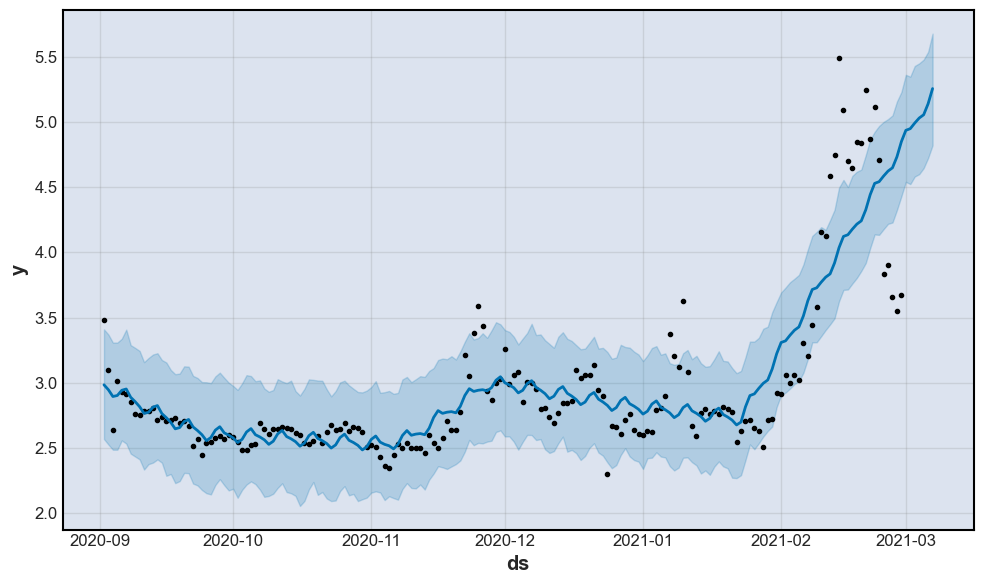

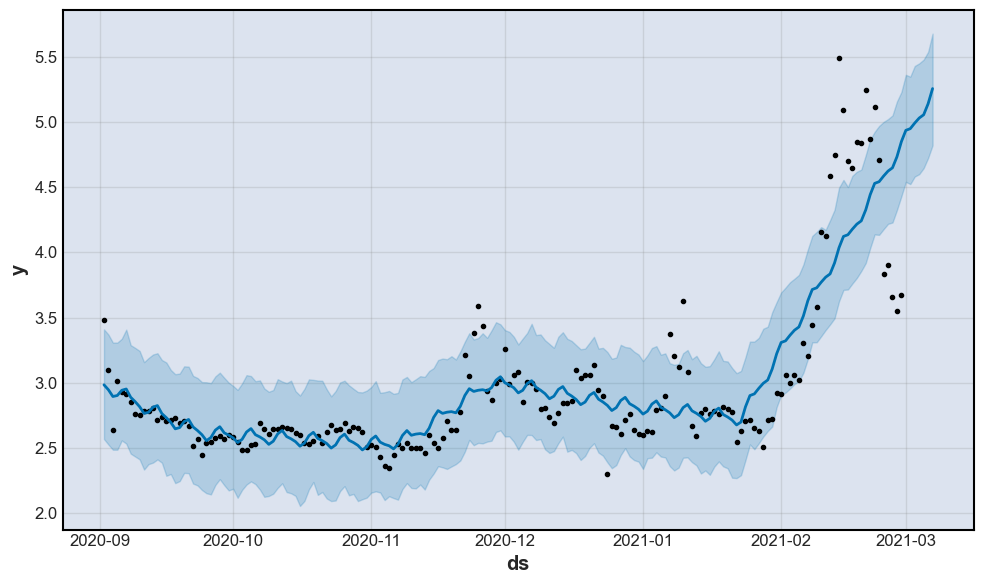

In [9]:
m.plot(forecast)

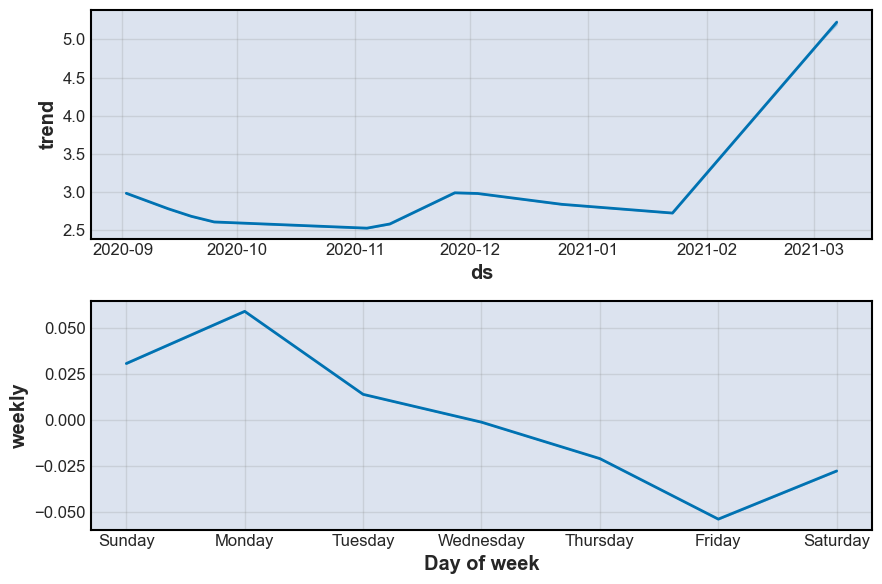

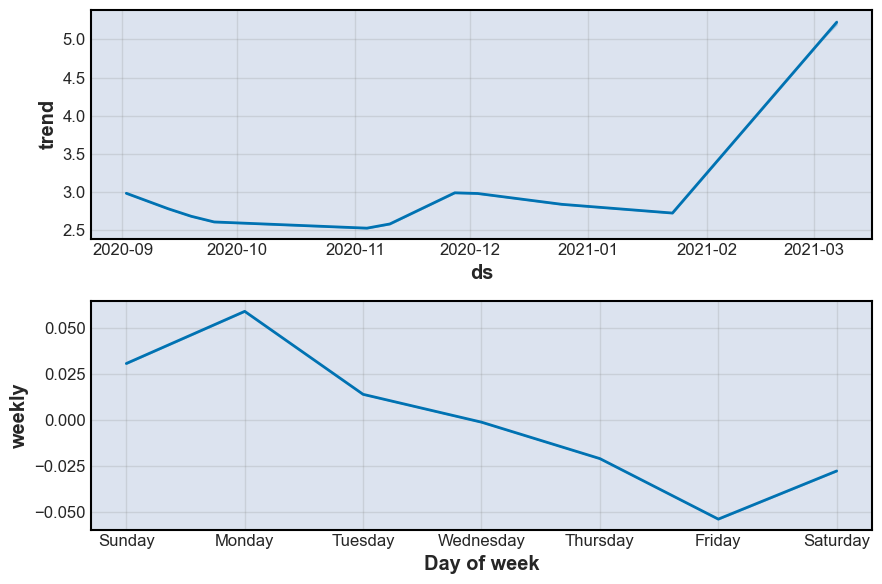

In [10]:
m.plot_components(forecast)